# INTRODUCTION

### A large international insurance company that shall remain anonymous routinely cross-sells its insurance products. The insurance products offered for sale include medical insurance, life insurance, homeowners insurance, car insurance, etc. The insurance company incentivizes its customers to purchase multiple products by offering discounts for bundled purchases. The dataset we have been provided records the company’s attempts to cross-sell car insurance to medical insurance policyholders who are believed to own a vehicle. A contract of adhesion (insurance policy) is a mutual agreement between insurer and insured detailing coverage, compensation and cost.  

# PROJECT OBJECTIVE

## The project objective is to utilize the Python programming language to create, evaluate, and improve various supervised machine-learning models that can best predict the likelihood of a medical insurance customer also buying car insurance. We have been given two datasets, bzan6357_insurance_3_TRAINING.csv and bzan6357_insurance_3_SCORE.csv. The TRAINING dataset contains the following columns :  
 
 **id** : (str type) 9-letter unique customer ID   
 **buy** : (num type; target) cross-selling outcome by 30 days post-contact, 1 = “purchased
vehicle insurance”, 0 = “no purchase”  
**age** : (num type) customer’s age at the time of contact  
**gender** : (str type) “male” or “female”  
**tenure** : (num type) number of days since policyholder’s current medical insurance has started  
**region** : (num type) unique code-number assigned to the region in which customer lives
(caution! many discrete values!)  
**dl** :  (num type) 1 = “has valid driver license”, 0 = “no driver license”  
**has_v_insurance** : (num type) 1 = “already has valid car insurance”, 0 = “no valid car insurance”  
**v_age** : (str type) vehicle age, three possible labels: “1-2 year”, “< 1 year”, “> 2 years”  
**v_accident** : (str type) “yes” or “no”, vehicle had accident(s) before  
**v_prem_quote** : (num type) annual premium quote for the cross-sold car insurance (local dollar,
possibly different for each policyholder)  
**cs_rep** : (num type) unique code-number assigned to the customer-service representative who
attempted to cross-sell the car insurance (caution! many discrete values!)

## The SCORE dataset contains all of the prevoius columns with the exception of 'buy'. 

# DATA PREPARATION

## Import Packages

In [952]:
#import everything, just in case
import pandas as pd
import numpy as np
from numpy import NaN as NA
import numpy.random as random
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, recall_score, roc_curve, precision_score, f1_score

#inline plot
%matplotlib inline

#seaborn style
sns.set_style('ticks')

#replicable results
np.random.seed(8)
random_state = 30

In [953]:
import tensorflow as tf
# print(tf.__version__)

In [954]:
from tensorflow import keras
# print(keras.__version__)

## Import data and print data

In [955]:
#import the training and score dataset
training_df = pd.read_csv('bzan6357_insurance_3_TRAINING.csv')
df_score = pd.read_csv('bzan6357_insurance_3_SCORE.csv')

In [956]:
df_score

,id_new,age,gender,tenure,region,dl,has_v_insurance,v_age,v_accident,v_prem_quote,cs_rep
0,a00020460,46,male,124,6,1,0,1-2 year,yes,26226,163
1,a00020461,25,female,285,46,1,0,< 1 year,yes,44564,154
2,a00020462,42,male,95,28,1,1,1-2 year,no,30796,122
3,a00020463,39,female,229,26,1,0,1-2 year,yes,35669,163
4,a00020464,42,male,114,28,1,0,1-2 year,yes,32039,122
...,...,...,...,...,...,...,...,...,...,...,...
1995,a00022455,25,male,46,41,1,0,< 1 year,yes,66605,154
1996,a00022456,45,female,248,28,1,1,1-2 year,no,37984,122
1997,a00022457,65,male,237,28,1,1,1-2 year,no,68068,122
1998,a00022458,76,male,162,28,1,0,1-2 year,yes,36590,122


In [957]:
df_score.dtypes

id_new             object
age                 int64
gender             object
tenure              int64
region              int64
dl                  int64
has_v_insurance     int64
v_age              object
v_accident         object
v_prem_quote        int64
cs_rep              int64
dtype: object

In [958]:
training_df

,id_new,buy,age,gender,tenure,region,dl,has_v_insurance,v_age,v_accident,v_prem_quote,cs_rep
0,a00000000,0,34,female,31,19,1,0,1-2 year,yes,27715,154
1,a00000001,0,50,male,211,34,1,0,1-2 year,yes,33945,154
2,a00000002,0,42,female,122,29,1,0,1-2 year,yes,37577,163
3,a00000003,0,28,male,75,3,1,0,1-2 year,yes,2630,154
4,a00000004,0,75,female,19,28,1,0,1-2 year,yes,47511,122
...,...,...,...,...,...,...,...,...,...,...,...,...
20455,a00020455,0,23,female,178,8,1,1,< 1 year,no,28254,151
20456,a00020456,0,61,male,298,28,1,0,1-2 year,yes,46134,122
20457,a00020457,0,68,male,44,28,1,1,1-2 year,no,2630,122
20458,a00020458,0,57,male,99,28,1,0,1-2 year,yes,36407,122


In [959]:
training_df.dtypes

id_new             object
buy                 int64
age                 int64
gender             object
tenure              int64
region              int64
dl                  int64
has_v_insurance     int64
v_age              object
v_accident         object
v_prem_quote        int64
cs_rep              int64
dtype: object

## Preprocess data

### Process Score 

In [960]:
score = df_score.drop(columns=['id_new'])

In [961]:
score.shape

(2000, 10)

### Perform Train Test Split

In [962]:
X=training_df.drop(columns=['id_new','buy'])
y=training_df['buy']

In [963]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1, shuffle=True)

In [964]:
# sanity check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12276, 10), (8184, 10), (12276,), (8184,))

### Hypothesis Testing

In [965]:
#T-Test for equal mean on "v_prem_quote"
#Null hypothesis is that "v_prem_quote" is the same across the train and test sets, for a satisfactory split.
#standard alpha of .05 
t_results=ttest_ind(X_train['v_prem_quote'],X_test['v_prem_quote'])
print('t-stat = {:5.3f}, p = {:5.3f}'.format(t_results[0],t_results[1]))

t-stat = -1.145, p = 0.252


#### Answer:
    Since the p-value is above the alpha of .05, we will accept the null hypothesis, that the v_prem_quote is a satisfactory random split. They are structurally similar data sets.

In [966]:
#T-Test for equal mean on "tenure"
#Null hypothesis is that "tenure" is the same across the train and test sets, for a satisfactory split.
#standard alpha of .05 
t_results=ttest_ind(X_train['tenure'],X_test['tenure'])
print('t-stat = {:5.3f}, p = {:5.3f}'.format(t_results[0],t_results[1]))

t-stat = 0.657, p = 0.511


#### Answer:
    Since the p-value is above the alpha of .05, we will accept the null hypothesis, that the tenure is a satisfactory random split. They are structurally similar data sets.

In [967]:
#z-test on target variable
count_default_train=y_train.value_counts()[1]
count_default_test=y_test.value_counts()[1]
z_stat, p=proportions_ztest(count=[count_default_train, count_default_test],nobs=[y_train.shape[0],
                                                                                 y_test.shape[0]])
print('z-stat={:0.3f}, p={:0.3f}'.format(z_stat,p))

z-stat=-0.700, p=0.484


In [968]:
#"v-accident" z-test
#null hypothesis is that v_accident is the same across the train and test sets, for a satisfactory split.
#standard alpha of .05
display(X_train.v_accident.value_counts(),X_test.v_accident.value_counts())

yes    8370
no     3906
Name: v_accident, dtype: int64

yes    5598
no     2586
Name: v_accident, dtype: int64

In [969]:
count_train=X_train.v_accident.value_counts()[1]
count_test=X_test.v_accident.value_counts()[1]
count_train, count_test

(3906, 2586)

In [970]:
z_stat,p=proportions_ztest(count=[count_train,count_test],nobs=[X_train.shape[0],X_test.shape[0]])
print('z-stat = {:0.3f}, p = {:0.3f}'.format(z_stat,p))

z-stat = 0.331, p = 0.741


#### Answer:
    Since the p-value is above the alpha of .05, we will accept the null hypothesis, that the v_accident is a satisfactory random split. They are structurally similar data sets.

## OneHot Encoder -- Pipeline

In [971]:
onehot_encoder=OneHotEncoder(drop='first')
cols_onehot=[ 'region', 'cs_rep','gender','v_age','v_accident']
#include every cat var. gender, v_age, v_accident, region, cs_rep


In [972]:
#min-max-norm
mmn_scaler=MinMaxScaler()
cols_mmn=X_train.drop(columns=cols_onehot).columns.tolist()

In [973]:
#transform
transformer=make_column_transformer((onehot_encoder,cols_onehot),(mmn_scaler,cols_mmn))

X_train_processed = transformer.fit_transform(X_train)
X_train_processed = pd.DataFrame(X_train_processed.toarray())

#test set for train 
X_test_processed=transformer.transform(X_test)
X_test_processed=pd.DataFrame(X_test_processed.toarray())

#score processing

score_processed = transformer.transform(score)
score_processed=pd.DataFrame(score_processed.toarray())

In [974]:
# sanity check for training set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12276, 10), (8184, 10), (12276,), (8184,))

In [975]:
#sanity check for score set
score_processed.shape


(2000, 64)

In [976]:
# one hot encoding for y train
y_ohe_train = pd.get_dummies(y_train, drop_first=False)
y_ohe_train = y_ohe_train[[0,1]]

# one hot encoding for y test
y_ohe_test = pd.get_dummies(y_test, drop_first=False)
y_ohe_test = y_ohe_test[[0,1]]

# one hot encoding for score
score_ohe = pd.get_dummies(score_processed, drop_first=False)
score_ohe = score_ohe[[0,1]]

In [977]:
y_ohe_train.shape, y_ohe_test.shape

((12276, 2), (8184, 2))

In [978]:
# Run this cell. Do not change anything!
y_tr_ohe = y_ohe_train.squeeze().to_numpy()
y_ts_ohe = y_ohe_test.squeeze().to_numpy()
score_ohe = score_ohe.squeeze().to_numpy()

#check
y_tr_ohe.shape, y_ts_ohe.shape



((12276, 2), (8184, 2))

In [979]:
score_ohe.shape

(2000, 2)

In [980]:
# Run this cell. Do not change anything!
print(y_ohe_train.shape, y_ohe_test.shape)
display(y_ohe_train.sample(3, random_state=random_state), y_ohe_test.sample(3, random_state=random_state))

(12276, 2) (8184, 2)


,0,1
14964,1,0
6922,1,0
11329,0,1


,0,1
4993,0,1
14760,1,0
9396,1,0


In [981]:
#sanity check
X_train_processed.describe().round(2).T[['mean','std','min','max']]

,mean,std,min,max
0,0.00,0.05,0.0,1.0
1,0.01,0.10,0.0,1.0
2,0.02,0.13,0.0,1.0
3,0.01,0.07,0.0,1.0
4,0.00,0.06,0.0,1.0
...,...,...,...,...
59,0.35,0.24,0.0,1.0
60,0.50,0.29,0.0,1.0
61,1.00,0.06,0.0,1.0
62,0.27,0.45,0.0,1.0


In [982]:
#more sanity
X_test_processed.describe().round(2).T[['mean','std','min','max']]

,mean,std,min,max
0,0.00,0.04,0.0,1.00
1,0.01,0.09,0.0,1.00
2,0.02,0.13,0.0,1.00
3,0.00,0.07,0.0,1.00
4,0.00,0.05,0.0,1.00
...,...,...,...,...
59,0.35,0.25,0.0,1.02
60,0.49,0.29,0.0,1.00
61,1.00,0.05,0.0,1.00
62,0.28,0.45,0.0,1.00


# RELEVANT EXPLORATORY DATA ANALYSES

## Correlation Evaluation

<AxesSubplot:>

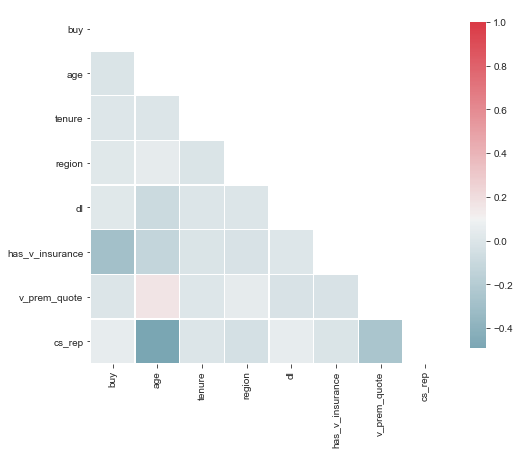

In [983]:
#correlation
corr=training_df.corr()

# prepare tools for making a half-matrix correlation heatmap
mask = np.triu(np.ones_like(corr, bool))
f, ax = plt.subplots(1,1, figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#plot heat map
sns.heatmap(corr,mask=mask, cmap=cmap,vmax=1, center=0.1, square=True, ax=ax,
           linewidths=.5, cbar_kws={'shrink': .75})

### As the heatmap does not show any strong correlations, no further correlation evaluation is necessary

# MODEL DEVELOPMENT and EVALUATION

## Adaline Model

### Preprocess data for Adaline Model

In [984]:
#create number data frame
X_number=training_df.drop(columns=['buy']).select_dtypes('number')

#z-standardization
z_scaler=StandardScaler()
scaled=z_scaler.fit_transform(X_number)
X_number_z=pd.DataFrame(scaled, columns=X_number.columns)
y = training_df['buy']

In [985]:
#describe new data frame
X_number_z.describe().round(2).T[['mean','std','min','max']]

,mean,std,min,max
age,-0.0,1.0,-1.44,2.72
tenure,0.0,1.0,-1.71,1.75
region,-0.0,1.0,-2.30,2.19
dl,0.0,1.0,-18.14,0.06
has_v_insurance,-0.0,1.0,-0.62,1.62
v_prem_quote,-0.0,1.0,-1.55,23.48
cs_rep,-0.0,1.0,-1.11,1.34


### Initilization

In [986]:
#Do not include random seed
rgen = random.RandomState(random_state)

# useful variables
n, m = X_train_processed.shape
# ------
epoches = 15
eta = 0.01

# critical variables
w_old = rgen.normal(loc=0.0, scale=0.01, size = m + 1)
delta_w = np.zeros(m + 1)

# print randomly generated variables
print(f'weight (vector) w has {w_old.shape[0]} elements, as follows:')
print()
print(np.around(w_old, 4))

weight (vector) w has 65 elements, as follows:

[-0.0126  0.0153 -0.0097  0.0047 -0.001   0.003  -0.0173  0.0159  0.0013
 -0.0111  0.0158  0.0011 -0.0076 -0.0078  0.0138  0.0076 -0.0029  0.0054
 -0.0208  0.0094 -0.0001 -0.0047 -0.0042  0.0106 -0.029   0.0162  0.0143
 -0.0066  0.0099 -0.017  -0.011  -0.0132  0.0081 -0.0104 -0.0069 -0.0085
  0.0111 -0.0192 -0.007   0.0085  0.0105 -0.0054 -0.0003  0.0139 -0.004
  0.0102  0.019  -0.0035 -0.0039 -0.0193  0.0055  0.0095  0.0078 -0.0179
  0.0124  0.0171  0.0032 -0.0099 -0.0116 -0.0002 -0.0158 -0.0124 -0.0041
 -0.0106 -0.0106]


In [987]:
#net input function
z = np.dot(X_train_processed, w_old[1:]) + w_old[0]


#activation
z_act = z*1

# #calc adaptive error using z_act and y
error = y_train - z_act

#optimization. Try to minimize cost function and print
gradient = -np.dot(y_train.T,error)


#compute weights and update
delta_w[1:] = -eta*gradient
delta_w[0] = eta * error.sum()
w_new = w_old + delta_w
print('old weight')
print(np.round(w_old,4))
print('new weight')
print(np.round(w_new,4))



old weight
[-0.0126  0.0153 -0.0097  0.0047 -0.001   0.003  -0.0173  0.0159  0.0013
 -0.0111  0.0158  0.0011 -0.0076 -0.0078  0.0138  0.0076 -0.0029  0.0054
 -0.0208  0.0094 -0.0001 -0.0047 -0.0042  0.0106 -0.029   0.0162  0.0143
 -0.0066  0.0099 -0.017  -0.011  -0.0132  0.0081 -0.0104 -0.0069 -0.0085
  0.0111 -0.0192 -0.007   0.0085  0.0105 -0.0054 -0.0003  0.0139 -0.004
  0.0102  0.019  -0.0035 -0.0039 -0.0193  0.0055  0.0095  0.0078 -0.0179
  0.0124  0.0171  0.0032 -0.0099 -0.0116 -0.0002 -0.0158 -0.0124 -0.0041
 -0.0106 -0.0106]
new weight
[25.6426 22.7473 22.7223 22.7367 22.731  22.7351 22.7148 22.7479 22.7334
 22.721  22.7478 22.7331 22.7244 22.7243 22.7459 22.7396 22.7292 22.7374
 22.7112 22.7414 22.732  22.7274 22.7278 22.7427 22.703  22.7482 22.7463
 22.7254 22.7419 22.715  22.721  22.7189 22.7401 22.7216 22.7251 22.7235
 22.7432 22.7128 22.725  22.7405 22.7425 22.7267 22.7317 22.746  22.7281
 22.7422 22.751  22.7285 22.7282 22.7128 22.7375 22.7416 22.7399 22.7141
 22.7444 22.

### Logistic Regression

In [988]:

#random_state = 1
rgen = random.RandomState(random_state)

# useful variables
n, m = X_train_processed.shape
# ------
epoches = 2
eta = 0.01

# critical variables
w_old = rgen.normal(loc=0.0, scale=0.01, size = m + 1)
delta_w = np.zeros(m + 1)

# print randomly generated variables
print(f'weight (vector) w has {w_old.shape[0]} elements, as follows:')
print()
print(np.around(w_old, 4))

weight (vector) w has 65 elements, as follows:

[-0.0126  0.0153 -0.0097  0.0047 -0.001   0.003  -0.0173  0.0159  0.0013
 -0.0111  0.0158  0.0011 -0.0076 -0.0078  0.0138  0.0076 -0.0029  0.0054
 -0.0208  0.0094 -0.0001 -0.0047 -0.0042  0.0106 -0.029   0.0162  0.0143
 -0.0066  0.0099 -0.017  -0.011  -0.0132  0.0081 -0.0104 -0.0069 -0.0085
  0.0111 -0.0192 -0.007   0.0085  0.0105 -0.0054 -0.0003  0.0139 -0.004
  0.0102  0.019  -0.0035 -0.0039 -0.0193  0.0055  0.0095  0.0078 -0.0179
  0.0124  0.0171  0.0032 -0.0099 -0.0116 -0.0002 -0.0158 -0.0124 -0.0041
 -0.0106 -0.0106]


### For loop for logistic regression

In [989]:
# Run this cell. Do not change anything!
# ------

#random_state = 1
rgen = random

# useful variables
n, m = X_train_processed.shape
# ------
epoches = 50
eta = 0.001

# critical variables
w_old = rgen.normal(loc=0.0, scale=0.01, size = m + 1)
delta_w = np.zeros(m + 1)

# print randomly generated variables
print(f'weight (vector) w has {w_old.shape[0]} elements, as follows:')
print()
print(np.around(w_old, 4))

weight (vector) w has 65 elements, as follows:

[ 0.0009  0.0109 -0.0195 -0.0139 -0.023   0.0241  0.0173  0.022   0.0079
  0.0098 -0.0118  0.0192 -0.0112 -0.0066 -0.0038 -0.0079  0.0086 -0.0023
 -0.0007 -0.0021  0.0135 -0.0061 -0.0017  0.0042 -0.0165 -0.0048  0.0054
  0.0117  0.0016 -0.0067  0.0144 -0.0022  0.0003  0.0018 -0.0006 -0.0054
  0.0047 -0.0116 -0.005  -0.0041 -0.0093  0.0008  0.0014  0.0008 -0.0016
  0.0055  0.017   0.0101 -0.0313  0.0114 -0.0187 -0.0178  0.0013 -0.0135
  0.0155  0.007  -0.0081 -0.0164  0.0033  0.0122  0.001   0.0188  0.0053
  0.008  -0.0031]


In [990]:

cost_values = []
for _ in range(epoches):

    # net input
    
    z = np.dot(X_train_processed, w_old[1:]) + w_old[0]
    
    # activation
    z_act = z*1
    z_clip = np.clip(z, a_min=-250, a_max=250)
    z_act = 1. / (1. + np.exp(-z_clip))
     # error
    error = y_train - z_act
     # gradient
    gradient = - np.dot(X_train_processed.T, error)
    # delta_weight: two-step
    delta_w[1:]= - eta * gradient
    delta_w[0] = eta * error.sum()
    # update weight
    w_new = w_old + delta_w
    w_old = w_new
    # compute cost, and save cost into "cost_values" list
    cost = -np.dot(y_train, np.log(z_act)) - np.dot(y_train, np.log(z_act))
    cost_values.append(cost)

### Model Accuracy

In [991]:
## Write your codes here
#net input
z = np.dot(X_train_processed, w_old[1:]) + w_old[0]
#activation
z_clip = np.clip(z, a_min=-250, a_max=250)
z_act = 1. / (1. + np.exp(-z_clip))
#cutoff threshold 
y_pred = (z_act >= .5).astype(int)
#accuracy
accuracy = accuracy_score(y_true=y_train, y_pred=y_pred)
#calc num of correct and incorrect classifications
n_correct = y_train.shape[0] * accuracy
n_incorrect = y_train.shape[0] * (1-accuracy)
#print 3 decimal places
print('trained model made {:.1f} correct and {:.1f} incorrect classifications on the train data.'.format(
    n_correct, n_incorrect))
print('Accuracy is {:.3f}'.format(accuracy))

trained model made 10042.0 correct and 2234.0 incorrect classifications on the train data.
Accuracy is 0.818


Text(0, 0.5, 'Cost')

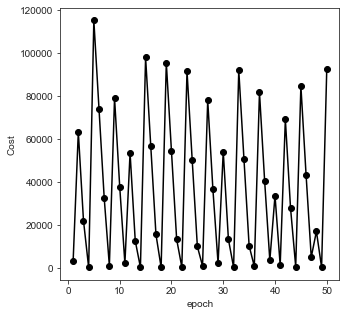

In [992]:
# Run this cell. Do not change anything!
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.plot(np.arange(1, 1+epoches, 1), cost_values, marker='o', color='black')
plt.xlabel('epoch')
plt.ylabel('Cost')

### Tensorflow with keras

In [993]:
#In your example y-train and y-test do not have empty y-axis

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12276, 10), (12276,), (8184, 10), (8184,))

### prepare flag y data

In [994]:
y_train_flag = np.argmax(y_train.to_numpy())
y_test_flag = np.argmax(y_test.to_numpy())

### convert data into numpy array

In [995]:


#convert to numpy array
X_train = X_train_processed.to_numpy()
X_test = X_test_processed.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [996]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape


((12276, 64), (8184, 64), (8184,), (12276,))

In [997]:
# universal variables
m = 64; d = 7; t = 2
epochs = 20
minibatch_size = 2**5

### define model

In [998]:
# this is so that results are replicable
# DO NOT CHANGE THIS!!
# tf.random.set_seed(random_state)

# put two layers together (1 hidden layer, 1 output layer)
prototype_mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='relu', name='hidden'),
                                  keras.layers.Dense(t, activation='sigmoid', name='output')])
prototype_mlp.summary()

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 7)                 455       
_________________________________________________________________
output (Dense)               (None, 2)                 16        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


### compile model

In [999]:
#tf.random.set_seed(random_state)

prototype_mlp.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [1000]:
 history = prototype_mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=2)

Epoch 1/20
384/384 - 0s - loss: 0.1927 - accuracy: 0.3272
Epoch 2/20
384/384 - 0s - loss: 0.1603 - accuracy: 0.3677
Epoch 3/20
384/384 - 0s - loss: 0.1521 - accuracy: 0.4196
Epoch 4/20
384/384 - 0s - loss: 0.1492 - accuracy: 0.4503
Epoch 5/20
384/384 - 0s - loss: 0.1474 - accuracy: 0.4684
Epoch 6/20
384/384 - 0s - loss: 0.1461 - accuracy: 0.4763
Epoch 7/20
384/384 - 0s - loss: 0.1449 - accuracy: 0.4793
Epoch 8/20
384/384 - 0s - loss: 0.1439 - accuracy: 0.4788
Epoch 9/20
384/384 - 0s - loss: 0.1430 - accuracy: 0.4677
Epoch 10/20
384/384 - 0s - loss: 0.1421 - accuracy: 0.4595
Epoch 11/20
384/384 - 0s - loss: 0.1414 - accuracy: 0.4477
Epoch 12/20
384/384 - 0s - loss: 0.1407 - accuracy: 0.4444
Epoch 13/20
384/384 - 0s - loss: 0.1400 - accuracy: 0.4420
Epoch 14/20
384/384 - 0s - loss: 0.1394 - accuracy: 0.4370
Epoch 15/20
384/384 - 0s - loss: 0.1389 - accuracy: 0.4339
Epoch 16/20
384/384 - 0s - loss: 0.1384 - accuracy: 0.4298
Epoch 17/20
384/384 - 0s - loss: 0.1380 - accuracy: 0.4258
Epoch 

### another benefit of using keras

Keep training model with updated epochs

In [1001]:
prototype_mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=10, verbose=2)

Epoch 1/10
384/384 - 0s - loss: 0.1365 - accuracy: 0.4119
Epoch 2/10
384/384 - 0s - loss: 0.1362 - accuracy: 0.4106
Epoch 3/10
384/384 - 0s - loss: 0.1359 - accuracy: 0.4087
Epoch 4/10
384/384 - 0s - loss: 0.1356 - accuracy: 0.4084
Epoch 5/10
384/384 - 0s - loss: 0.1353 - accuracy: 0.4075
Epoch 6/10
384/384 - 0s - loss: 0.1351 - accuracy: 0.4048
Epoch 7/10
384/384 - 0s - loss: 0.1349 - accuracy: 0.4042
Epoch 8/10
384/384 - 0s - loss: 0.1347 - accuracy: 0.4040
Epoch 9/10
384/384 - 0s - loss: 0.1345 - accuracy: 0.4025
Epoch 10/10
384/384 - 0s - loss: 0.1343 - accuracy: 0.4022


### train (aka "fit") model


In [1002]:
prototype_mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=30, verbose=2)

Epoch 1/30
384/384 - 0s - loss: 0.1341 - accuracy: 0.4009
Epoch 2/30
384/384 - 0s - loss: 0.1339 - accuracy: 0.4005
Epoch 3/30
384/384 - 0s - loss: 0.1338 - accuracy: 0.4005
Epoch 4/30
384/384 - 0s - loss: 0.1336 - accuracy: 0.4006
Epoch 5/30
384/384 - 0s - loss: 0.1335 - accuracy: 0.4003
Epoch 6/30
384/384 - 0s - loss: 0.1334 - accuracy: 0.4000
Epoch 7/30
384/384 - 0s - loss: 0.1332 - accuracy: 0.3990
Epoch 8/30
384/384 - 0s - loss: 0.1331 - accuracy: 0.3992
Epoch 9/30
384/384 - 0s - loss: 0.1330 - accuracy: 0.3989
Epoch 10/30
384/384 - 0s - loss: 0.1329 - accuracy: 0.3981
Epoch 11/30
384/384 - 0s - loss: 0.1328 - accuracy: 0.3975
Epoch 12/30
384/384 - 0s - loss: 0.1327 - accuracy: 0.3972
Epoch 13/30
384/384 - 0s - loss: 0.1326 - accuracy: 0.3974
Epoch 14/30
384/384 - 0s - loss: 0.1325 - accuracy: 0.3962
Epoch 15/30
384/384 - 0s - loss: 0.1324 - accuracy: 0.3969
Epoch 16/30
384/384 - 0s - loss: 0.1323 - accuracy: 0.3970
Epoch 17/30
384/384 - 0s - loss: 0.1323 - accuracy: 0.3965
Epoch 

### plot cost and accuracy curve

(1.0, 21.0)

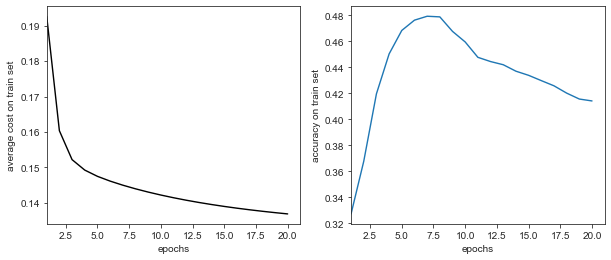

In [1003]:
stored_values = history.history

fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax0, ax1 = ax
ax0.plot(np.arange(1, 1+epochs, 1), stored_values['loss'], color='black', linewidth=1.4)
ax0.set_xlabel('epochs')
ax0.set_ylabel('average cost on train set')
ax0.set_xlim(1, 1+epochs)
ax1.plot(np.arange(1, 1+epochs, 1), stored_values['accuracy'], linewidth=1.4)
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy on train set')
ax1.set_xlim(1, 1+epochs)

### evaluate model

In [1004]:
# train set
cost, accuracy = prototype_mlp.evaluate(X_train, y_train)
print()
print('accuracy of train set is {:.3}'.format(accuracy))

384/384 [==============================] - 0s 464us/step - loss: 0.1314 - accuracy: 0.3869

accuracy of train set is 0.387


### add regularization

In [1005]:
# this is so that results are replicable
# DO NOT CHANGE THIS!!
#tf.random.set_seed(random_state)

# put two layers together (1 hidden layer, 1 output layer) ---- Note the changes below!
mlp_regulariz = keras.Sequential(
    [keras.layers.Dense(d, input_shape=(m,), activation='sigmoid', name='hidden', 
                        kernel_regularizer='l2'),    #<---- note, it's lower-case "L", not number 1
     keras.layers.Dense(t, activation='sigmoid', name='output', kernel_regularizer='l2')]
)
mlp_regulariz.summary()

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 7)                 455       
_________________________________________________________________
output (Dense)               (None, 2)                 16        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


### compile model

In [1006]:
# this is so that results are replicable
# DO NOT CHANGE THIS!!
#tf.random.set_seed(random_state)

mlp_regulariz.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

### train aka (fit model)

In [1007]:
history = mlp_regulariz.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=2)

Epoch 1/20
384/384 - 0s - loss: 0.2383 - accuracy: 0.1820
Epoch 2/20
384/384 - 0s - loss: 0.1733 - accuracy: 0.1820
Epoch 3/20
384/384 - 0s - loss: 0.1620 - accuracy: 0.3415
Epoch 4/20
384/384 - 0s - loss: 0.1566 - accuracy: 0.4407
Epoch 5/20
384/384 - 0s - loss: 0.1540 - accuracy: 0.2401
Epoch 6/20
384/384 - 0s - loss: 0.1525 - accuracy: 0.1820
Epoch 7/20
384/384 - 0s - loss: 0.1516 - accuracy: 0.1820
Epoch 8/20
384/384 - 0s - loss: 0.1510 - accuracy: 0.1820
Epoch 9/20
384/384 - 0s - loss: 0.1505 - accuracy: 0.1820
Epoch 10/20
384/384 - 0s - loss: 0.1501 - accuracy: 0.1820
Epoch 11/20
384/384 - 0s - loss: 0.1498 - accuracy: 0.1820
Epoch 12/20
384/384 - 0s - loss: 0.1496 - accuracy: 0.1820
Epoch 13/20
384/384 - 0s - loss: 0.1494 - accuracy: 0.1820
Epoch 14/20
384/384 - 0s - loss: 0.1493 - accuracy: 0.1820
Epoch 15/20
384/384 - 0s - loss: 0.1492 - accuracy: 0.1820
Epoch 16/20
384/384 - 0s - loss: 0.1491 - accuracy: 0.1820
Epoch 17/20
384/384 - 0s - loss: 0.1491 - accuracy: 0.1820
Epoch 

### plot cost and accuracy curve

(1.0, 21.0)

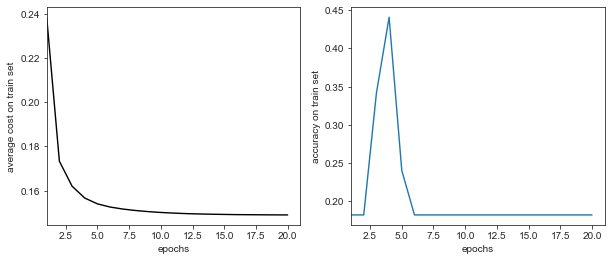

In [1008]:
stored_values = history.history

fig, ax = plt.subplots(1,2, figsize=(10, 4))
ax0, ax1 = ax
ax0.plot(np.arange(1, 1+epochs, 1), stored_values['loss'], color='black', linewidth=1.4)
ax0.set_xlabel('epochs')
ax0.set_ylabel('average cost on train set')
ax0.set_xlim(1, 1+epochs)
ax1.plot(np.arange(1, 1+epochs, 1), stored_values['accuracy'], linewidth=1.4)
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy on train set')
ax1.set_xlim(1, 1+epochs)

### evaluate

In [1009]:
# train set
cost, accuracy = mlp_regulariz.evaluate(X_train, y_train)
print()
print('accuracy of train set is {:.3}'.format(accuracy))

384/384 [==============================] - 0s 467us/step - loss: 0.1489 - accuracy: 0.1820

accuracy of train set is 0.182


### Add validation process
We will allocate the trailing 10% of the train dataset as the validation set during model training.
>It is fine to not randomly shuffle the data before allocating the last 10% of data because the train dataset is already a random subset splitted from the original data

### define a model
First, define model (with regularization) as above

In [1010]:
# this is so that results are replicable
# DO NOT CHANGE THIS!!
tf.random.set_seed(random_state)

# put two layers together (1 hidden layer, 1 output layer)
mlp_val = keras.Sequential(
    [keras.layers.Dense(d, input_shape=(m,), activation='sigmoid', name='hidden', kernel_regularizer='l2'),
     keras.layers.Dense(t, activation='sigmoid', name='output', kernel_regularizer='l2')]
)
mlp_val.summary()

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 7)                 455       
_________________________________________________________________
output (Dense)               (None, 2)                 16        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


### compile

In [1011]:
# this is so that results are replicable
# DO NOT CHANGE THIS!!
tf.random.set_seed(random_state)

mlp_val.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### train aka fit

In [1012]:
history = prototype_mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=2)

Epoch 1/20
384/384 - 0s - loss: 0.1314 - accuracy: 0.3871
Epoch 2/20
384/384 - 0s - loss: 0.1314 - accuracy: 0.3860
Epoch 3/20
384/384 - 0s - loss: 0.1313 - accuracy: 0.3861
Epoch 4/20
384/384 - 0s - loss: 0.1313 - accuracy: 0.3855
Epoch 5/20
384/384 - 0s - loss: 0.1313 - accuracy: 0.3857
Epoch 6/20
384/384 - 0s - loss: 0.1312 - accuracy: 0.3842
Epoch 7/20
384/384 - 0s - loss: 0.1312 - accuracy: 0.3849
Epoch 8/20
384/384 - 0s - loss: 0.1312 - accuracy: 0.3847
Epoch 9/20
384/384 - 0s - loss: 0.1311 - accuracy: 0.3843
Epoch 10/20
384/384 - 0s - loss: 0.1311 - accuracy: 0.3847
Epoch 11/20
384/384 - 0s - loss: 0.1311 - accuracy: 0.3838
Epoch 12/20
384/384 - 0s - loss: 0.1310 - accuracy: 0.3842
Epoch 13/20
384/384 - 0s - loss: 0.1310 - accuracy: 0.3840
Epoch 14/20
384/384 - 0s - loss: 0.1310 - accuracy: 0.3829
Epoch 15/20
384/384 - 0s - loss: 0.1310 - accuracy: 0.3844
Epoch 16/20
384/384 - 0s - loss: 0.1309 - accuracy: 0.3844
Epoch 17/20
384/384 - 0s - loss: 0.1309 - accuracy: 0.3843
Epoch 

# Compared the 4 versions side-by-side
For a clear comparison, train each model using two different setups:
1. fewer epochs to see differences in early training efficiency
1. much more epochs after models are fully trained to see differences of model performance on test-set

In [1013]:
mlp_list = {'setup_1':[], 'setup_2':[]}
scores_list = {'setup_1':[], 'setup_2':[]}

**The four model versions:**
1. basic MLP, SGD
1. MLP with L2 regularization, Adam
1. MLP with L2 regularization, Adam, 10% train set allotted to validation set
1. MLP with L2 regularization, Adam, 10% validation, improved activation functions

In [1014]:
model_notes_list = ['basic MLP, SGD', 
                    'MLP L2 regulariz, sgd', 
                    'MLP L2 regulariz, sgd, 10% validation set', 
                    'MLP L2 regulariz, sgd, 10% validation set, ReLU & Softmax']

## *setup no. 1*

In [1015]:
epochs = 20

# this is so that results are replicable
# DO NOT CHANGE THIS!!
#tf.random.set_seed(random_state)

# track time
start = time()

#1
print(model_notes_list[0])
mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='sigmoid', name='hidden'),
                        keras.layers.Dense(t, activation='sigmoid', name='output')])
mlp.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=0)
scores = history.history
mlp_list['setup_1'].append(mlp); scores_list['setup_1'].append(scores)

#2
print('\n' + model_notes_list[1])
mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='sigmoid', name='hidden', kernel_regularizer='l2'),
                        keras.layers.Dense(t, activation='sigmoid', name='output', kernel_regularizer='l2')])
mlp.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=0)
scores = history.history


#3
print('\n' + model_notes_list[2])
mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='sigmoid', name='hidden', kernel_regularizer='l2'),
                        keras.layers.Dense(t, activation='sigmoid', name='output', kernel_regularizer='l2')])
mlp.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=0, validation_split=0.1)
scores = history.history


#4
print('\n' + model_notes_list[3])
mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='relu', name='hidden', kernel_regularizer='l2'),
                        keras.layers.Dense(t, activation='softmax', name='output', kernel_regularizer='l2')])
mlp.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=0, validation_split=0.1)
scores = history.history
mlp_list['setup_1'].append(mlp); scores_list['setup_1'].append(scores)

# track time
seconds = time() - start
mins, sec = divmod(seconds, 60)   # <-- divmod() returns a tuple of (quotient, remainder) after division
print('\nTook {:.0f} mins and {:.0f} sec'.format(mins, sec))

basic MLP, SGD

MLP L2 regulariz, sgd

MLP L2 regulariz, sgd, 10% validation set

MLP L2 regulariz, sgd, 10% validation set, ReLU & Softmax

Took 0 mins and 13 sec


## *setup no. 2*

In [1016]:
epochs = 20

# this is so that results are replicable
# DO NOT CHANGE THIS!!
#tf.random.set_seed(random_state)

# track time
start = time()

#1
print(model_notes_list[0])
mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='sigmoid', name='hidden'),
                        keras.layers.Dense(t, activation='sigmoid', name='output')])
mlp.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=0)
scores = history.history
mlp_list['setup_2'].append(mlp); scores_list['setup_2'].append(scores)

#2
print('\n' + model_notes_list[1])
mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='sigmoid', name='hidden', kernel_regularizer='l2'),
                        keras.layers.Dense(t, activation='sigmoid', name='output', kernel_regularizer='l2')])
mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=0)
scores = history.history
mlp_list['setup_2'].append(mlp); scores_list['setup_2'].append(scores)

#3
print('\n' + model_notes_list[2])
mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='sigmoid', name='hidden', kernel_regularizer='l2'),
                        keras.layers.Dense(t, activation='sigmoid', name='output', kernel_regularizer='l2')])
mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=0, validation_split=0.1)
scores = history.history
mlp_list['setup_2'].append(mlp); scores_list['setup_2'].append(scores)

#4
print('\n' + model_notes_list[3])
mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='relu', name='hidden', kernel_regularizer='l2'),
                        keras.layers.Dense(t, activation='softmax', name='output', kernel_regularizer='l2')])
mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=0, validation_split=0.1)
scores = history.history
mlp_list['setup_2'].append(mlp); scores_list['setup_2'].append(scores)

# track time
seconds = time() - start
mins, sec = divmod(seconds, 60)   # <-- divmod() returns a tuple of (quotient, remainder) after division
print('\nTook {:.0f} mins and {:.0f} sec'.format(mins, sec))

basic MLP, SGD

MLP L2 regulariz, sgd

MLP L2 regulariz, sgd, 10% validation set

MLP L2 regulariz, sgd, 10% validation set, ReLU & Softmax

Took 0 mins and 13 sec


### plot cost curve of 4 models

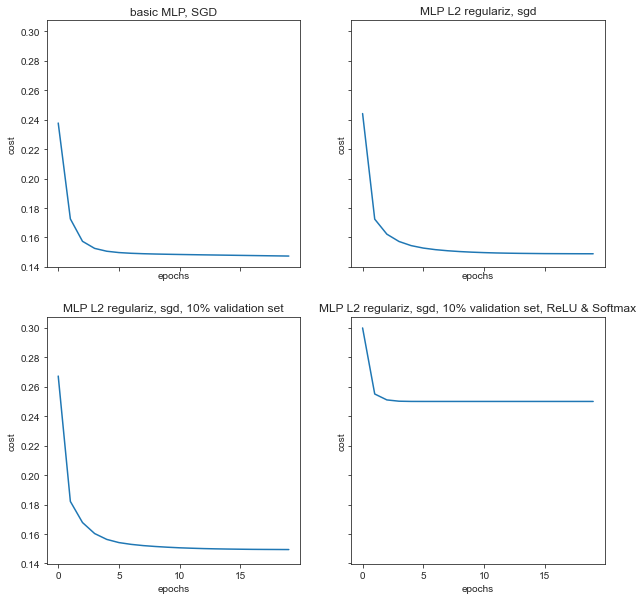

In [1017]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        axx = ax[i, j]
        axx.plot(scores_list['setup_2'][i+j+(i==1)]['loss'])
        axx.set_title(model_notes_list[i+j+(i==1)])
        axx.set_xlabel('epochs')
        axx.set_ylabel('cost')

### plot train set accuracy of 4 models

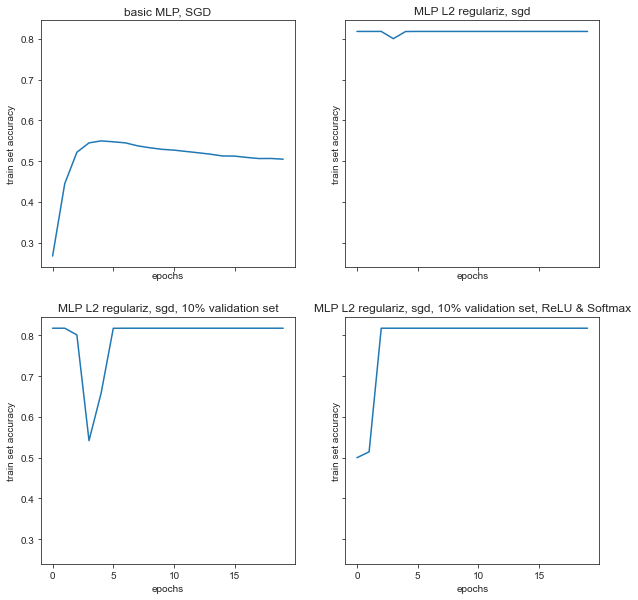

In [1018]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        axx = ax[i, j]
        axx.plot(scores_list['setup_2'][i+j+(i==1)]['accuracy'])
        axx.set_title(model_notes_list[i+j+(i==1)])
        axx.set_xlabel('epochs')
        axx.set_ylabel('train set accuracy')

### finally, examine test set accuracy after sufficient training of all 4 models

In [1019]:
test_cost_list = []
test_accuracy_list = []
for model in mlp_list['setup_2']:
    cost, accuracy = model.evaluate(X_test, y_test)
    test_cost_list.append(cost)
    test_accuracy_list.append(accuracy)

256/256 [==============================] - 0s 463us/step - loss: 0.2500 - accuracy: 0.8141


In [1020]:
print('-'* 50)
for i in range(4):
    print(f'model: {model_notes_list[i]}')
    print(f'test set accuracy: {test_accuracy_list[i]:.3f}')
    print('-'* 50)

--------------------------------------------------
model: basic MLP, SGD
test set accuracy: 0.508
--------------------------------------------------
model: MLP L2 regulariz, sgd
test set accuracy: 0.814
--------------------------------------------------
model: MLP L2 regulariz, sgd, 10% validation set
test set accuracy: 0.814
--------------------------------------------------
model: MLP L2 regulariz, sgd, 10% validation set, ReLU & Softmax
test set accuracy: 0.814
--------------------------------------------------


# RESULTS AND INTERPRETATION

## Our group chose to use MLP with L2 regularization and sigmoid function as the activation function because it is simpler. Also, when looking at the plot, it was the most consistent with high level of accuracy without a severe dip.

In [1021]:
print('\n' + model_notes_list[1])
mlp = keras.Sequential([keras.layers.Dense(d, input_shape=(m,), activation='sigmoid', name='hidden', kernel_regularizer='l2'),
                        keras.layers.Dense(t, activation='sigmoid', name='output', kernel_regularizer='l2')])
mlp.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = mlp.fit(x=X_train, y=y_train, batch_size=minibatch_size, epochs=epochs, verbose=0)
scores = history.history
mlp_list['setup_2'].append(mlp); scores_list['setup_2'].append(scores)


MLP L2 regulariz, sgd


# GET PREDICTION USING SCORE DATASET

### Using the MLP L2 regularization with sigmoid model 

In [1022]:

#Use model to predict
#check dimensions of y-pred
y_predicted = mlp.predict(score_processed)

In [1023]:
y_predicted.shape

(2000, 2)

In [1024]:
df_Submit = df_score[['id_new']].copy()

In [1025]:
df_Submit['probability'] = y_predicted[:, 1]

In [1026]:
display(df_Submit.head())

,id_new,probability
0,a00020460,0.184096
1,a00020461,0.184098
2,a00020462,0.184080
3,a00020463,0.184094
4,a00020464,0.184097


In [1027]:
#add classification column
df_Submit['classification'] = np.argmax(y_predicted, axis=-1)


In [1028]:
#print
display(df_Submit.head())


,id_new,probability,classification
0,a00020460,0.184096,1
1,a00020461,0.184098,1
2,a00020462,0.184080,1
3,a00020463,0.184094,1
4,a00020464,0.184097,1


In [1029]:
#export
df_Submit.to_csv('my_prediction.csv', index=False)
